# Author : Mohammed Saqlain Attar

### 1.Scikit learn comes with pre-loaded dataset, load the digits dataset from that collection and write a helper function to plot the image using matplotlib

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
digits = datasets.load_digits()

In [3]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [4]:
digits.data.shape

(1797, 64)

In [5]:

digits.target.shape

(1797,)

In [6]:
digits.images.shape

(1797, 8, 8)

In [7]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

### Data

In [8]:
images = digits.data
labels = digits.target

In [9]:
images[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

Number: 0


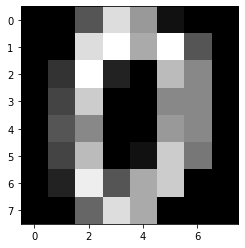

In [10]:
plt.imshow(np.reshape(images[0],(8,-1)),cmap=plt.cm.gray)
print('Number:',labels[0])
plt.show()

## 2.Make a train -test split with 20% of the data set aside for testing. Fit a logistic regression model and observe the accuracy.

In [11]:
x_train, x_test, y_train, y_test = train_test_split(images,labels, test_size=0.2, random_state = 10)

In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [13]:
x_train.shape

(1437, 64)

In [14]:
x_test.shape

(360, 64)

In [15]:
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression()

In [16]:
model_logistic.fit(x_train, y_train)

LogisticRegression()

In [17]:
y_pred = model_logistic.predict(x_test)

In [18]:
metrics.accuracy_score(y_test, y_pred)

0.9666666666666667

## 3.Using scikit learn perform a PCA transformation such that the transformed dataset can explain 95% of the variance in the original dataset. Find out the number of components in the projected subspace.[Hint:Refer to decomposition module of scikit learn]

In [19]:
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components=0.95)
sklearn_pca.fit(x_train)

x_train_transformed = sklearn_pca.transform(x_train)

print(x_train_transformed.shape)
print(x_test.shape)



x_test_transformed =sklearn_pca.transform(x_test)
print(x_test_transformed.shape)

(1437, 39)
(360, 64)
(360, 39)


In [20]:
(sklearn_pca.explained_variance_ratio_).sum()

0.9510723807821858

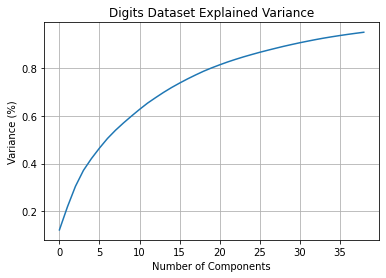

In [21]:

plt.figure()
plt.plot(np.cumsum(sklearn_pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Digits Dataset Explained Variance')
plt.grid(True)
plt.show()

## 4.Transform the dataset and fit a logistic regression and observe the accuracy. Compare it with the previous model andcomment on the accuracy.[Hint: Project both the train and test samples to the new subspace]

In [22]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train_transformed)
x_test = sc.fit_transform(x_test_transformed)

In [23]:
model_logistic_new = LogisticRegression()

In [24]:
model_logistic_new.fit(x_train,y_train)

LogisticRegression()

In [25]:
y_pred_new = model_logistic_new.predict(x_test)

In [26]:
metrics.accuracy_score(y_test, y_pred_new)

0.95

## 5.Compute the confusion matrix and count the number of instances that has gone wrong. For each of the wrong sample,plot the digit along with predicted and original label.

In [27]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred_new)
confusion_matrix

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 30,  2,  0,  0,  0,  1,  0,  1,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 38,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 32,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0, 32,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 38,  0,  0],
       [ 0,  1,  2,  0,  0,  0,  1,  0, 28,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 37]], dtype=int64)

In [28]:
report = metrics.classification_report(y_test,y_pred_new)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.94      0.88      0.91        34
           2       0.87      1.00      0.93        34
           3       0.97      0.95      0.96        40
           4       0.97      0.94      0.96        34
           5       0.94      1.00      0.97        32
           6       0.95      0.97      0.96        37
           7       1.00      0.95      0.97        40
           8       0.88      0.85      0.86        33
           9       0.97      0.95      0.96        39

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360

